In [15]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

# show all rows and all columns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

# Handle Missing Data ( By delete rows and columns )

In [18]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [17]:
df = pd.read_csv(r"C:\Users\user\Pictures\PYTHON_PANDAS\banglore.csv")
df

area_type          availability  \
0      Super built-up  Area                19-Dec   
1                Plot  Area         Ready To Move   
2            Built-up  Area         Ready To Move   
3      Super built-up  Area         Ready To Move   
4      Super built-up  Area         Ready To Move   
5      Super built-up  Area         Ready To Move   
6      Super built-up  Area                18-May   
7      Super built-up  Area         Ready To Move   
8      Super built-up  Area         Ready To Move   
9                Plot  Area         Ready To Move   
10     Super built-up  Area                18-Feb   
11               Plot  Area         Ready To Move   
12     Super built-up  Area         Ready To Move   
13           Built-up  Area         Ready To Move   
14               Plot  Area         Ready To Move   
15     Super built-up  Area         Ready To Move   
16     Super built-up  Area         Ready To Move   
17     Super built-up  Area         Ready To Move   
18     Super built-up  Area         Ready To Move   
19     Super built-up  Area         Ready To Move   
20           Built-up  Area         Ready To Move   
21     Super built-up  Area                19-Dec   
22               Plot  Area         Ready To Move   
23     Super built-up  Area         Ready To Move   
24     Super built-up  Area                18-Nov   
25     Super built-up  Area                18-May   
26     Super built-up  Area         Ready To Move   
27           Built-up  Area                20-Dec   
28     Super built-up  Area                17-Oct   
29     Super built-up  Area         Ready To Move   
30     Super built-up  Area                19-Dec   
31     Super built-up  Area         Ready To Move   
32     Super built-up  Area         Ready To Move   
33     Super built-up  Area         Ready To Move   
34           Built-up  Area         Ready To Move   
35     Super built-up  Area                21-Dec   
36     Super built-up  Area         Ready To Move   
37     Super built-up  Area         Ready To Move   
38     Super built-up  Area         Ready To Move   
39           Built-up  Area         Ready To Move   
40           Built-up  Area         Ready To Move   
41     Super built-up  Area                19-Dec   
42     Super built-up  Area         Ready To Move   
43               Plot  Area         Ready To Move   
44     Super built-up  Area                19-Sep   
45               Plot  Area         Ready To Move   
46     Super built-up  Area         Ready To Move   
47     Super built-up  Area                20-Sep   
48               Plot  Area         Ready To Move   
49           Built-up  Area         Ready To Move   
50     Super built-up  Area         Ready To Move   
51     Super built-up  Area                18-Mar   
52           Built-up  Area         Ready To Move   
53     Super built-up  Area         Ready To Move   
54     Super built-up  Area         Ready To Move   
55     Super built-up  Area         Ready To Move   
56           Built-up  Area                20-Feb   
57     Super built-up  Area         Ready To Move   
58               Plot  Area         Ready To Move   
59     Super built-up  Area         Ready To Move   
60               Plot  Area         Ready To Move   
61     Super built-up  Area         Ready To Move   
62               Plot  Area         Ready To Move   
63           Built-up  Area         Ready To Move   
64           Built-up  Area         Ready To Move   
65     Super built-up  Area         Ready To Move   
66     Super built-up  Area                18-Apr   
67     Super built-up  Area         Ready To Move   
68               Plot  Area         Ready To Move   
69     Super built-up  Area         Ready To Move   
70               Plot  Area         Ready To Move   
71     Super built-up  Area                20-Aug   
72     Super built-up  Area         Ready To Move   
73     Super built-up  Area                18-Apr   
74     Super built-up  Area         Ready T

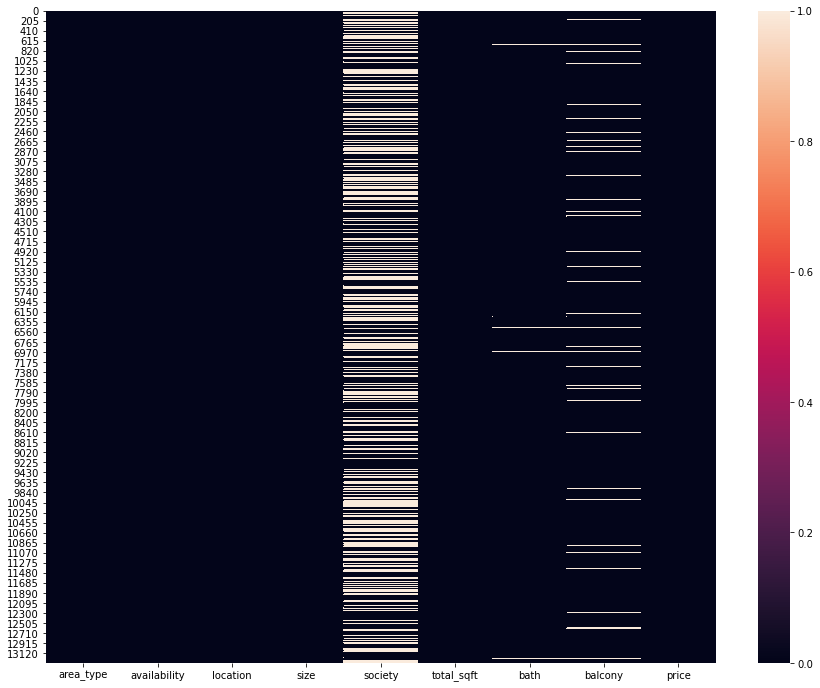

In [21]:
plt.figure(figsize=(15,12))
sns.heatmap(df.isnull())

In [44]:
null_var = df.isnull().sum()/df.shape[0] *100
null_var

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [47]:
drop_columns = null_var[null_var>10].keys()    # more then 10% null columns will be dropped
drop_columns

Index(['society'], dtype='object')

In [50]:
df2_drop_clm = df.drop(columns = drop_columns)
df2_drop_clm.shape

(13320, 8)

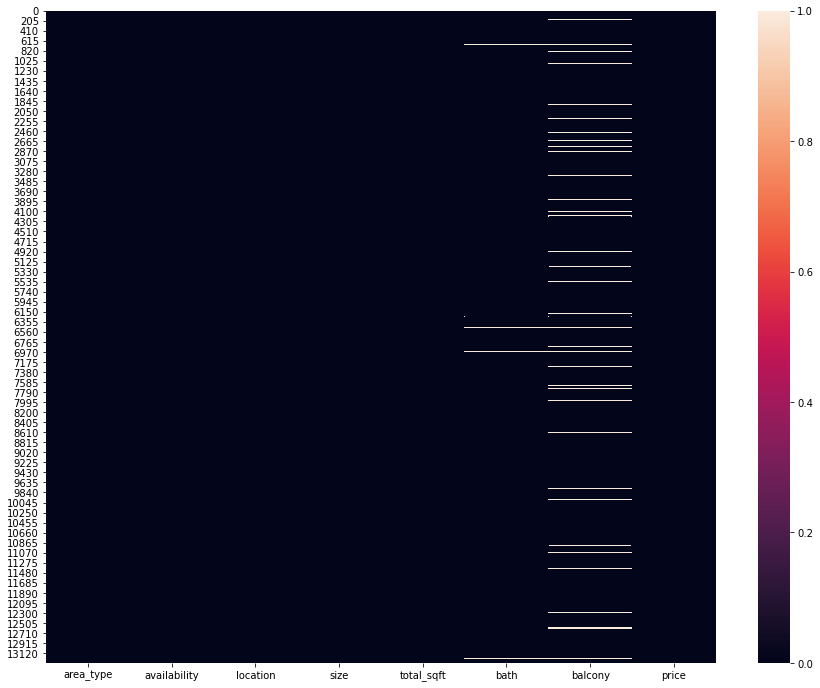

In [52]:
plt.figure(figsize=(15,12))
sns.heatmap(df2_drop_clm.isnull())

In [55]:
df3_drop_rows = df2_drop_clm.dropna()

In [56]:
df3_drop_rows.isnull().sum().sum()  # total null values in df3_drop_rows dataframe

0

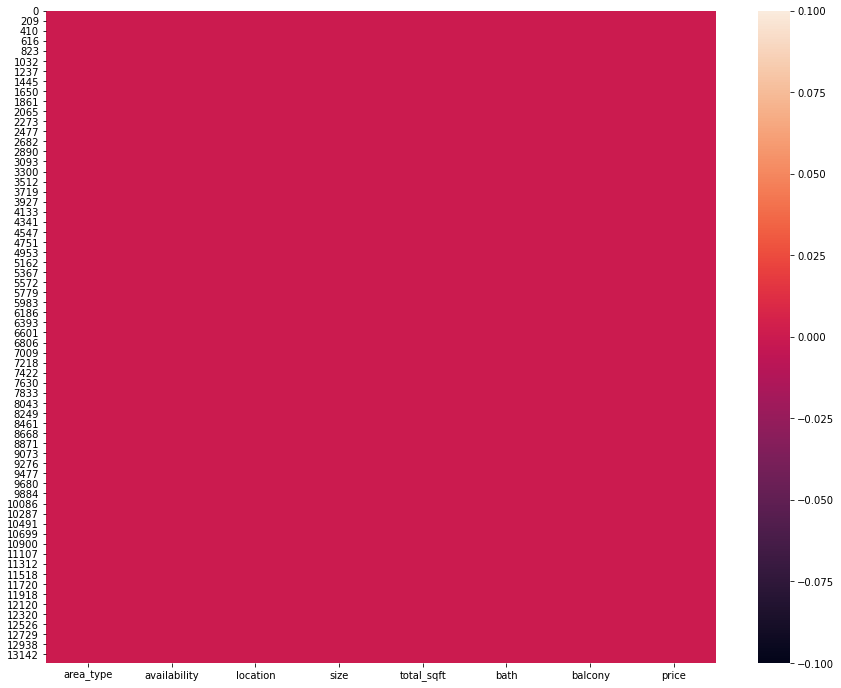

In [57]:
plt.figure(figsize=(15,12))
sns.heatmap(df3_drop_rows.isnull())

In [58]:
df3_drop_rows.shape

(12710, 8)

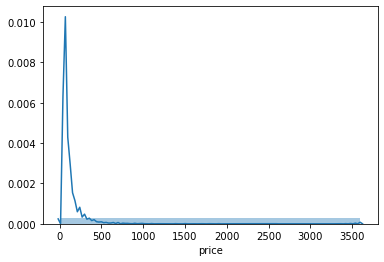

In [62]:
sns.distplot(df['price'],bins=1)

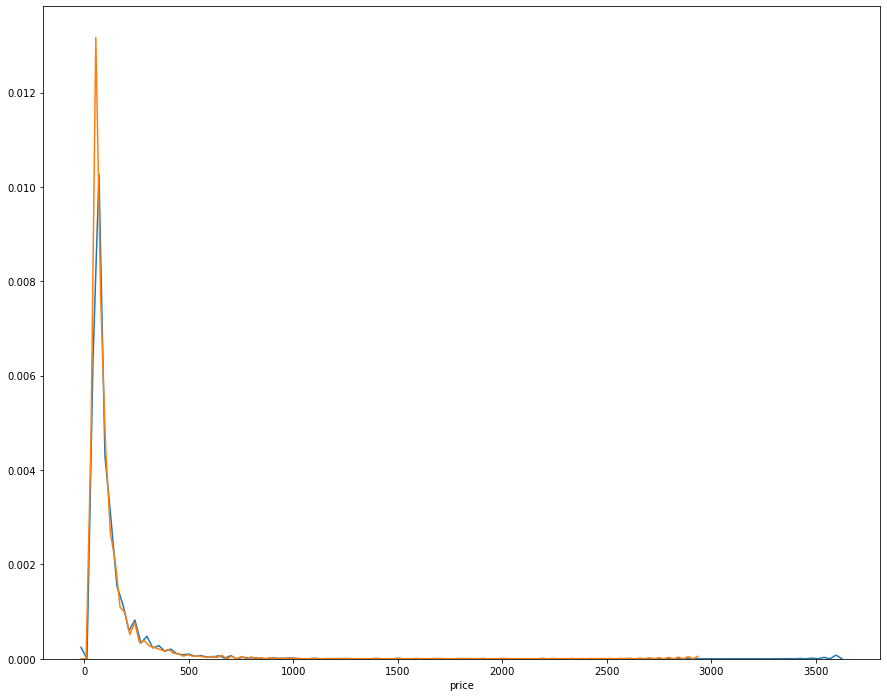

In [67]:
plt.figure(figsize=(15,12))

sns.distplot(df['price'],hist=False)
sns.distplot(df3_drop_rows['price'],hist=False)

In [69]:
df3_drop_rows.select_dtypes(include=['int64','float64']).columns

Index(['bath', 'balcony', 'price'], dtype='object')

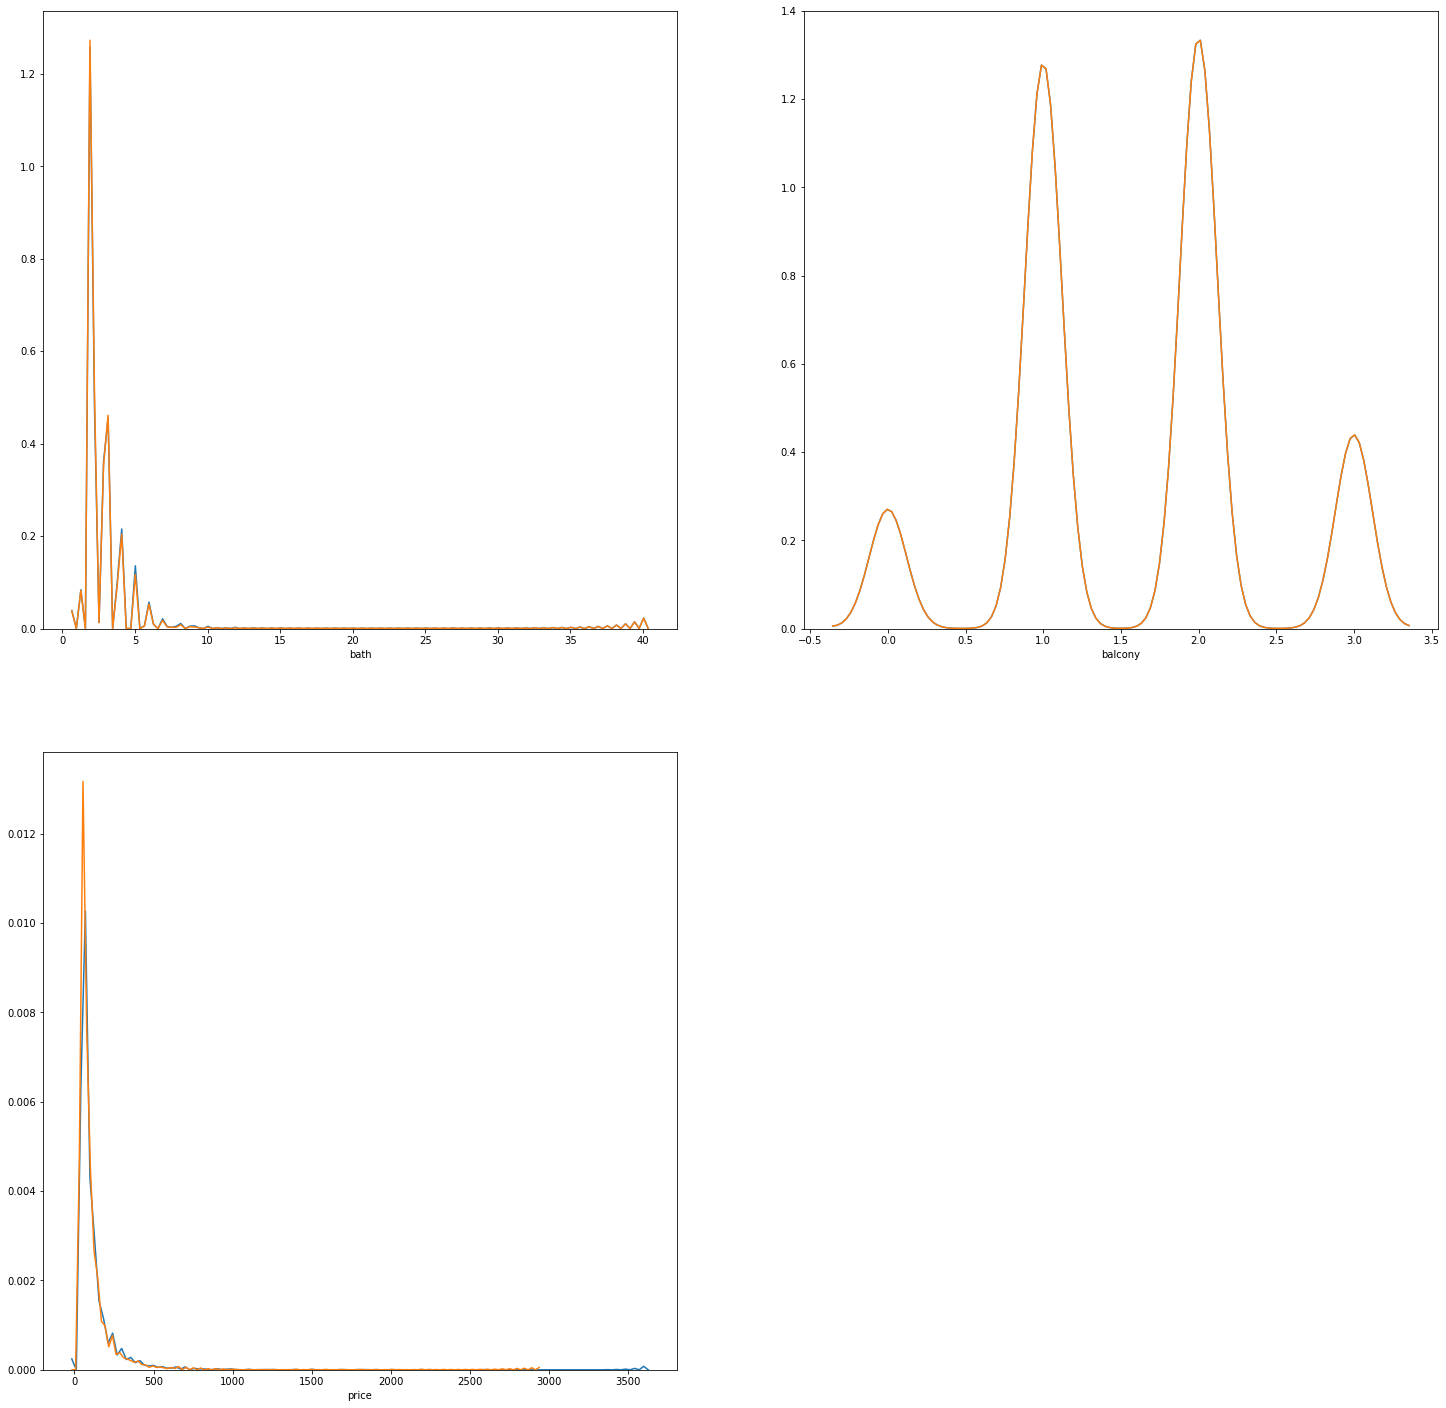

In [72]:
#distribution of numerical data
num_var = ['bath', 'balcony', 'price']

plt.figure(figsize=(25,25))

for i,var in enumerate(num_var):
    plt.subplot(2,2,i+1)
    sns.distplot(df[var],hist=False)
    sns.distplot(df3_drop_rows[var],hist=False)

In [73]:
df3_drop_rows.select_dtypes(include=['object']).columns

Index(['area_type', 'availability', 'location', 'size', 'total_sqft'], dtype='object')

In [78]:
pd.concat([df['location'].value_counts()/df.shape[0]*100,
           df3_drop_rows['location'].value_counts()/df3_drop_rows.shape[0]*100], axis=1,keys=['location_org','location_clean'])

location_org  \
Whitefield                                              4.054054   
Sarjapur  Road                                          2.995495   
Electronic City                                         2.267267   
Kanakpura Road                                          2.049550   
Thanisandra                                             1.756757   
Yelahanka                                               1.599099   
Uttarahalli                                             1.396396   
Hebbal                                                  1.328829   
Marathahalli                                            1.313814   
Raja Rajeshwari Nagar                                   1.283784   
Hennur Road                                             1.141141   
Bannerghatta Road                                       1.141141   
7th Phase JP Nagar                                      1.118619   
Haralur Road                                            1.066066   
Electronic City Phase II                                0.990991   
Rajaji Nagar                                            0.803303   
Chandapura                                              0.750751   
Bellandur                                               0.720721   
KR Puram                                                0.683183   
Electronics City Phase 1                                0.660661   
Hoodi                                                   0.660661   
Yeshwanthpur                                            0.638138   
Begur Road                                              0.630631   
Sarjapur                                                0.615616   
Kasavanhalli                                            0.600601   
Harlur                                                  0.593093   
Banashankari                                            0.563063   
Hormavu                                                 0.555556   
Kengeri                                                 0.548048   
Ramamurthy Nagar                                        0.548048   
JP Nagar                                                0.540541   
Koramangala                                             0.540541   
Hosa Road                                               0.540541   
Old Madras Road                                         0.533033   
Jakkur                                                  0.533033   
Varthur                                                 0.525526   
Kothanur                                                0.495495   
Kaggadasapura                                           0.480480   
Nagarbhavi                                              0.472973   
Akshaya Nagar                                           0.465465   
Thigalarapalya                                          0.465465   
TC Palaya                                               0.450450   
Malleshwaram                                            0.435435   
8th Phase JP Nagar                                      0.427928   
Rachenahalli                                            0.420420   
Hennur                                                  0.412913   
Budigere                                                0.405405   
Jigani                                                  0.405405   
HSR Layout                                              0.397898   
Jalahalli                                               0.390390   
Hulimavu                                                0.390390   
Panathur                                                0.382883   
Bisuvanahalli                                           0.382883   
Ramagondanahalli                                        0.375375   
Mysore Road                                             0.375375   
Hegde Nagar                                             0.367868   
Bhoganhalli                                             0.367868   
Gottigere                                               0.360360   
Hosur Road                              

#       Second method        #############

# Handle Missing Data ( fill by mean, median, mode )

In [80]:
df.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00

In [82]:
missing_value_per = df.isnull().sum()/df.shape[0] *100
missing_value_per

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [83]:
# columns that have missing value > 20%
missing_value_col_gre_20 = missing_value_per[missing_value_per>20].keys()
missing_value_col_gre_20

Index(['society'], dtype='object')

In [84]:
df2_drop_clm = df.drop(columns=missing_value_col_gre_20)
df2_drop_clm.shape

(13320, 8)

In [85]:
# numerical type
df3 = df2_drop_clm.select_dtypes(include=['int64','float64'])

In [86]:
#fill with mean value in numerical columns
df3_mean = df3.fillna(df3.mean())

In [87]:
df3_mean.isnull().sum().sum()

0

In [116]:
# categorical type
df4 = df2_drop_clm.select_dtypes(include=['object'])
df4.columns

Index(['area_type', 'availability', 'location', 'size', 'total_sqft'], dtype='object')

In [117]:
#fill with mode value in categorical columns
df4_mode = df4
for var in df4.columns :
    df4_mode[var] = df4.fillna(df4[var].mode())


In [118]:
df4_mode.isnull().sum().sum()

0

In [119]:
df4_mode.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
dtype: int64

In [124]:
#concat both dataframes df3_mean and df4_mode
new_df = pd.concat([df3_mean,df4_mode],axis=1)
new_df.head()

bath  balcony   price             area_type          availability  \
0   2.0      1.0   39.07  Super built-up  Area  Super built-up  Area   
1   5.0      3.0  120.00            Plot  Area            Plot  Area   
2   2.0      3.0   62.00        Built-up  Area        Built-up  Area   
3   3.0      1.0   95.00  Super built-up  Area  Super built-up  Area   
4   2.0      1.0   51.00  Super built-up  Area  Super built-up  Area   

               location                  size            total_sqft  
0  Super built-up  Area  Super built-up  Area  Super built-up  Area  
1            Plot  Area            Plot  Area            Plot  Area  
2        Built-up  Area        Built-up  Area        Built-up  Area  
3  Super built-up  Area  Super built-up  Area  Super built-up  Area  
4  Super built-up  Area  Super built-up  Area  Super built-up  Area

In [126]:
print(new_df.shape)
print(new_df.isnull().sum().sum())

(13320, 8)
0
(13320, 9)


In [127]:
# distribution of numerical columns
miss_num_var = df3.columns
miss_num_var

Index(['bath', 'balcony', 'price'], dtype='object')

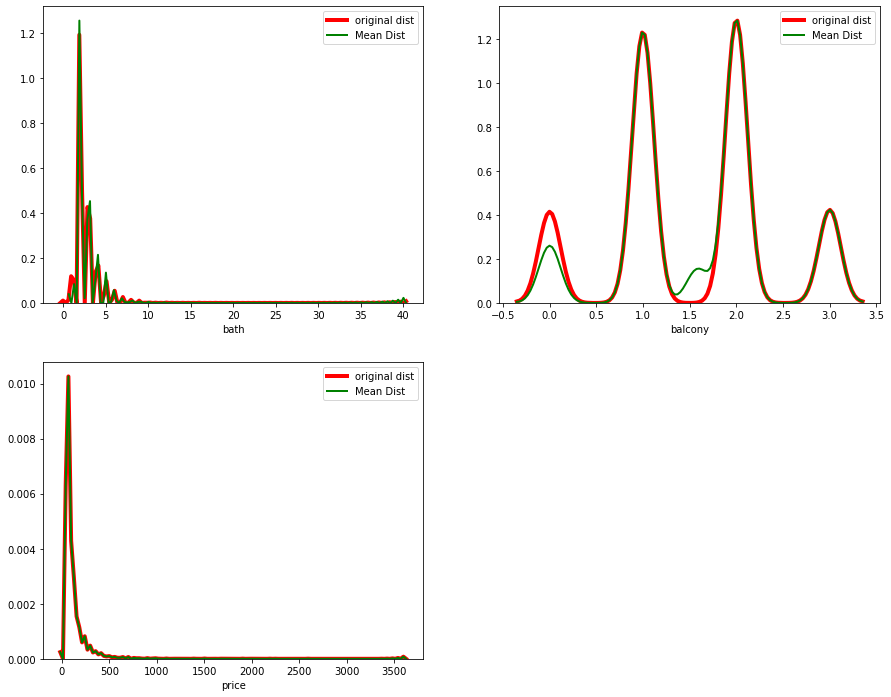

In [129]:
plt.figure(figsize=(15,12))

for i,var in enumerate (miss_num_var) :
    plt.subplot(2,2,i+1)
    sns.distplot(df[var].replace(np.nan,0),hist=False,bins=20,kde_kws={'linewidth':4,'color':"r"},label="original dist")
    sns.distplot(df3_mean[var],bins=20,hist=False,kde_kws={'linewidth':2,'color':"g"},label="Mean Dist")
    plt.legend()

# third method

# Handle Missing Data ( Numerical missing value imputation By Class )

In [130]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [131]:
missing_value_per = df.isnull().sum()/df.shape[0] *100

# columns that have missing value > 20%
missing_value_col_gre_20 = missing_value_per[missing_value_per>20].keys()

df2_drop_clm = df.drop(columns=missing_value_col_gre_20)
df2_drop_clm.shape

(13320, 8)

In [133]:
df3_num = df2_drop_clm.select_dtypes(include=['int64','float64'])
df3_num.columns

Index(['bath', 'balcony', 'price'], dtype='object')

In [138]:
num_var_miss = [var for var in df3_num.columns if df3_num[var].isnull().sum() >0]
num_var_miss

['bath', 'balcony']

In [159]:
num_var_miss
cat_vars = ["area_type","availability"]

In [162]:
df_copy = df.copy()
for numvar,catvar in zip(num_var_miss,cat_vars) :
    for var_class in df[catvar].unique() :
        temp_df1 =  df[df.loc[:,catvar]==var_class][numvar]
        df_copy.update(df[df.loc[:,catvar]==var_class][numvar].replace(np.NaN,temp_df1.mean()) ) 

In [163]:
df_copy[num_var_miss].isnull().sum()

bath       0
balcony    0
dtype: int64